### Importing and Understanding Data

In [229]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [324]:
# Importing bike.csv
BK = pd.read_csv('bike_dataset.csv')

In [232]:
BK.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [233]:
BK.shape

(730, 16)

In [234]:
BK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [235]:
BK.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [236]:
BK['dteday'].dtype

dtype('O')

In [325]:
#convert the datatype of dteday column to datetime.

BK['dteday'] =  pd.to_datetime(BK['dteday'],format='%d-%m-%Y')

In [326]:
BK['dteday'].dtype

dtype('<M8[ns]')

In [327]:
BK['dteday'].head()

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: dteday, dtype: datetime64[ns]

In [328]:
#Extracting Month, Year  from the Date

BK['year'] = pd.DatetimeIndex(BK['dteday']).year
BK['month'] = pd.DatetimeIndex(BK['dteday']).month

In [329]:
# Dropping the'yr','mnth' columns

BK.drop(['yr','mnth'],axis=1,inplace=True)

In [330]:
#Dropping the holiday column as the workingday column is enough 

BK.drop('holiday',axis=1,inplace=True)

In [331]:
# Renaming some columns 

BK.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)

In [332]:
 # Dropping the redundant columns

BK.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [333]:
BK.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [334]:
# encoding season 

label = {1:'spring',2:'summer',3:'fall',4:'winter'}
BK['season'] = BK['season'].map(label)

In [335]:
BK.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,spring,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,spring,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,spring,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,spring,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,spring,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


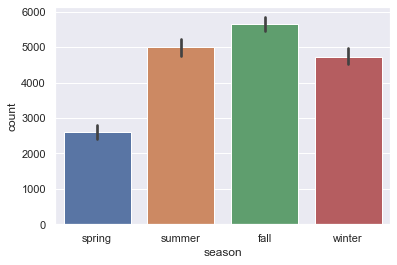

In [248]:
sns.barplot('season','count',data=BK)

### Bike Rentals are highest during the Fall season

In [249]:
# encoding weathersit
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
labels = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
BK['weathersit'] = BK['weathersit'].map(labels)

In [250]:
BK.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,spring,1,1,Mist,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,spring,2,1,Mist,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,spring,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,spring,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,spring,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018,1


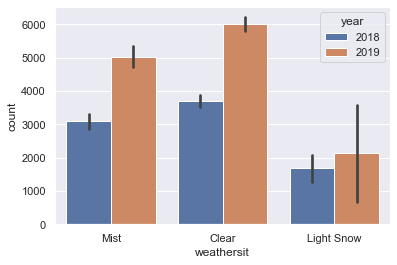

In [251]:
sns.barplot('weathersit','count',hue='year',data=BK)

### Bikes are rented highest in Partly cloudy weather


In [252]:
# workingday
#if day is neither weekend nor holiday is 1, otherwise is 0

lbl = {1:'working_day',0:'Holiday'}
BK['workingday'] = BK['workingday'].map(lbl)

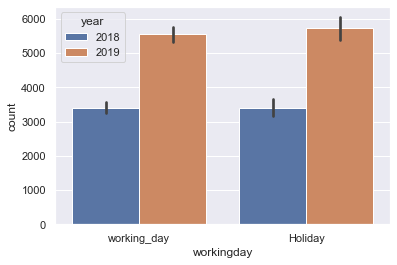

In [253]:
sns.barplot('workingday','count',hue='year',data=BK )

### Bikes are rented more on holidays

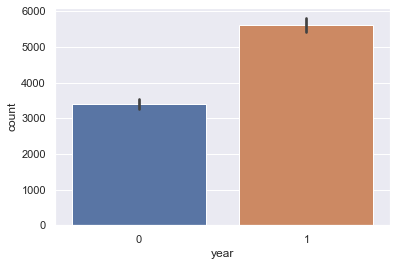

In [336]:
#year

yrs = {2019:1,2018:0}
BK['year'] = BK['year'].map(yrs)

sns.barplot('year','count',data=BK)

### Bike Rental is popular in 2019 than compared to in 2018


In [255]:
# Month

lbls = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
BK['month'] = BK['month'].map(lbls)

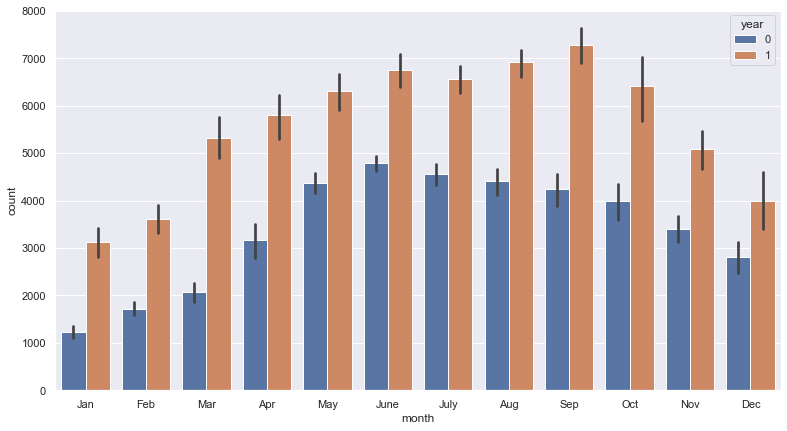

In [256]:
plt.figure(figsize=(13,7))
sns.barplot('month','count',hue='year',data=BK)

In [257]:
# WeekDay

WEEK = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
BK['weekday'] = BK['weekday'].map(WEEK)

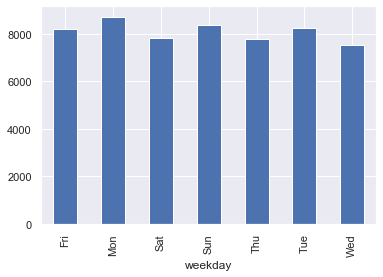

In [258]:
BK.groupby('weekday')['count'].max().plot(kind='bar')

### Bike Rentals are maximum on Sunday and Monday


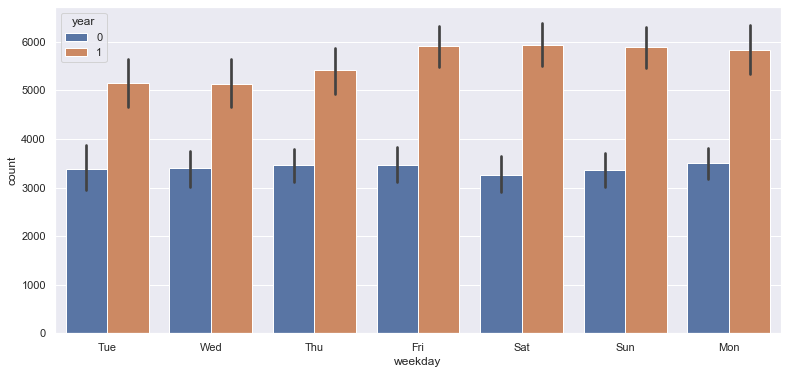

In [259]:
plt.figure(figsize=(13,6))
sns.barplot('weekday','count',hue='year',data=BK)

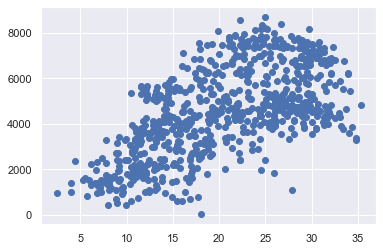

In [260]:
plt.scatter('temp','count',data=BK)

### Rented bikes are observed at higher temperatures


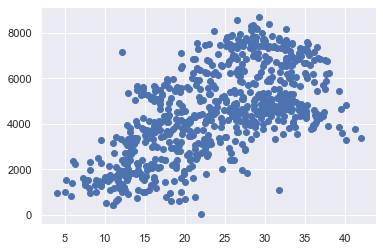

In [261]:
plt.scatter('atemp','count',data=BK)


### Rented Bike are observed at higher "feel-like" temperatures.


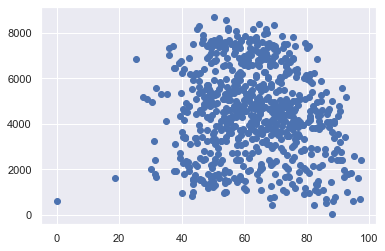

In [262]:
plt.scatter('humidity','count',data=BK)


### Bike Rentals are observed during high humidity.

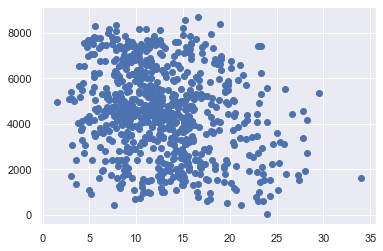

In [263]:
plt.scatter('windspeed','count',data=BK)

#### Windspeeds observed increasing with a greater temperature difference.
#### Windspeed near the surface is highly correlated with the temperature.

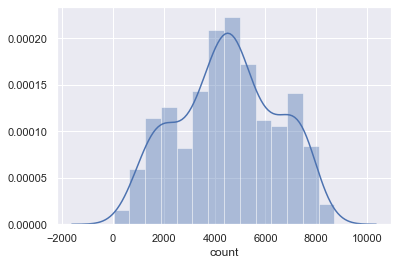

In [264]:
sns.distplot(BK['count'])


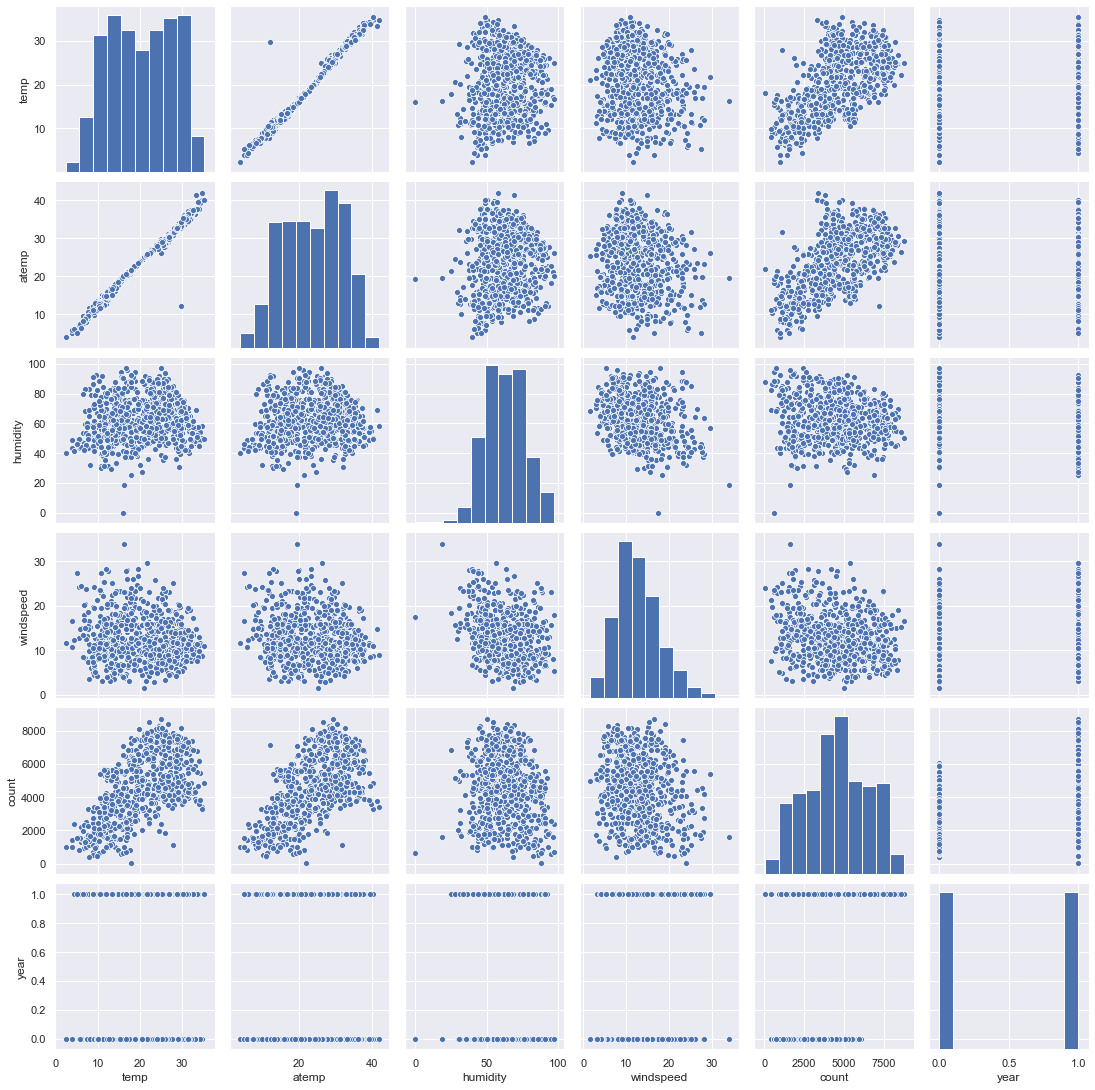

In [265]:
sns.pairplot(BK)

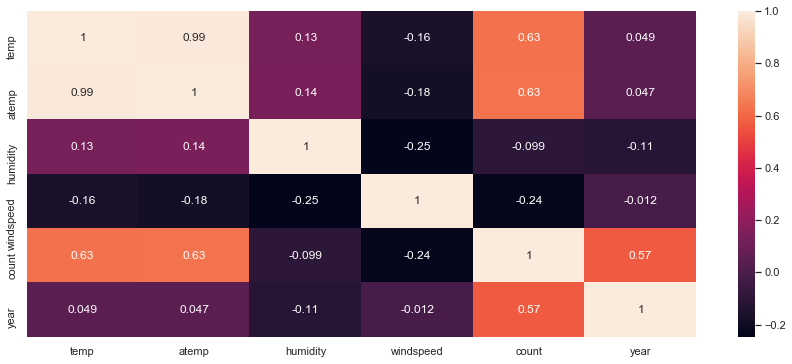

In [266]:
plt.figure(figsize = (15,6))
sns.heatmap(BK.corr(),annot=True)

### Here atemp and temp are highly correlated so drop one to avoid multicollinearity.

In [267]:
BK.drop('atemp',axis=1,inplace=True)

In [268]:
BK.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan


## Dealing With Categorical Variables

In [269]:
weather= pd.get_dummies(BK['weathersit'],drop_first=True)

week_day= pd.get_dummies(BK['weekday'],drop_first=True)

month= pd.get_dummies(BK['month'],drop_first=True)

seasons = pd.get_dummies(BK['season'],drop_first=True)

working_day = pd.get_dummies(BK['workingday'],drop_first=True)

BK= pd.concat([BK,seasons,working_day,weather,month,week_day],axis=1)


In [270]:
BK.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan,...,0,0,0,0,0,0,0,0,1,0
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan,...,0,0,0,0,0,0,0,0,0,1
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan,...,0,0,0,0,0,0,0,1,0,0
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan,...,0,0,0,0,0,0,0,0,0,0
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan,...,0,0,0,0,0,1,0,0,0,0


In [271]:
# Dropping columns as they are already dummy-encoded.

BK.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [289]:
BK.head()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Splitting the Data into Training and Testing Sets


In [290]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(BK, train_size = 0.7, test_size = 0.3, random_state = 100)

In [291]:
# Rescaling the Features

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [292]:
# Apply scaler() to all the columns except the'dummy' variables.

num_vars=['temp','humidity','windspeed','count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
653,-0.121335,-0.514725,-0.117752,1.562685,1,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
576,1.231731,0.516433,-0.330615,1.399629,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
426,-0.420478,-0.069854,-0.385694,-0.215554,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
728,-1.294913,-1.045032,2.018143,-1.379511,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
482,-0.627580,-1.000840,-0.779889,-0.136589,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


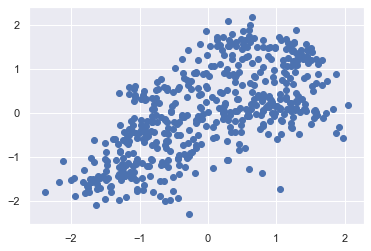

In [293]:
plt.scatter('temp','count',data=df_train)

### Dividing into X and Y sets for the model building


In [294]:
y_train = df_train.pop('count')
X_train = df_train

### Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [295]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [296]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [297]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('humidity', False, 10),
 ('windspeed', False, 8),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 2),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 15),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 16),
 ('Sun', True, 1),
 ('Thu', False, 14),
 ('Tue', False, 12),
 ('Wed', False, 11)]

In [298]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'working_day', 'Light Snow', 'Mist', 'July',
       'Sep', 'Mon', 'Sun'],
      dtype='object')

In [299]:
X_train.columns[~rfe.support_]

Index(['humidity', 'windspeed', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sat', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [300]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [301]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [302]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [303]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          3.16e-176
Time:                        15:46:12   Log-Likelihood:                -292.12
No. Observations:                 510   AIC:                             606.2
Df Residuals:                     499   BIC:                             652.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5893      0.136     -4.340      

## All the variables with p-value are less than 0.05

In [305]:
X_train_new= X_train_rfe.drop('const',axis=1)

In [307]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,working_day,2.58
2,spring,2.10
0,temp,2.02
1,year,2.02
5,Mist,1.58
8,Mon,1.39
6,July,1.38
9,Sun,1.33
7,Sep,1.18
4,Light Snow,1.07


### All the variables have VIF less than 5 


## Residual Analysis of the train data
    So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of 
    linear regression), let us plot the histogram of the error terms and see what it looks like.

In [308]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

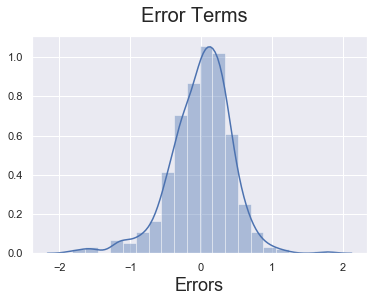

In [309]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

In [310]:
num_vars=['temp','humidity','windspeed','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

In [311]:
#Dividing into X_test and y_test

y_test = df_test.pop('count')
X_test = df_test

In [312]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [313]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

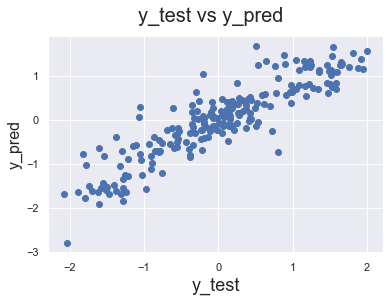

In [314]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [316]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8051381112407531